In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv(r"D:\Mentorness\Task_2\FastagFraudDetection.csv")

In [4]:
df.head()

,Transaction_ID,Timestamp,Vehicle_Type,FastagID,TollBoothID,Lane_Type,Vehicle_Dimensions,Transaction_Amount,Amount_paid,Geographical_Location,Vehicle_Speed,Vehicle_Plate_Number,Fraud_indicator
0,1,1/6/2023 11:20,Bus,FTG-001-ABC-121,A-101,Express,Large,350,120,"13.059816123454882, 77.77068662374292",65,KA11AB1234,Fraud
1,2,1/7/2023 14:55,Car,FTG-002-XYZ-451,B-102,Regular,Small,120,100,"13.059816123454882, 77.77068662374292",78,KA66CD5678,Fraud
2,3,1/8/2023 18:25,Motorcycle,NaN,D-104,Regular,Small,0,0,"13.059816123454882, 77.77068662374292",53,KA88EF9012,Not Fraud
3,4,1/9/2023 2:05,Truck,FTG-044-LMN-322,C-103,Regular,Large,350,120,"13.059816123454882, 77.77068662374292",92,KA11GH3456,Fraud
4,5,1/10/2023 6:35,Van,FTG-505-DEF-652,B-102,Express,Medium,140,100,"13.059816123454882, 77.77068662374292",60,KA44IJ6789,Fraud


#### dropping unnecessary columns

In [5]:
df.drop(columns=['Transaction_ID','FastagID','FastagID','TollBoothID'],inplace=True)

In [13]:
df['Timestamp']=pd.to_datetime(df['Timestamp'])

In [15]:
df['Day'] = df['Timestamp'].dt.day
df['Month'] = df['Timestamp'].dt.month
df['Year'] = df['Timestamp'].dt.year
df['Hour'] = df['Timestamp'].dt.hour

In [16]:
df.shape

(5000, 14)

In [17]:
df.isnull().sum()

Timestamp                0
Vehicle_Type             0
Lane_Type                0
Vehicle_Dimensions       0
Transaction_Amount       0
Amount_paid              0
Geographical_Location    0
Vehicle_Speed            0
Vehicle_Plate_Number     0
Fraud_indicator          0
Day                      0
Month                    0
Year                     0
Hour                     0
dtype: int64

In [18]:
df['Fraud_indicator'].value_counts()

Not Fraud    4017
Fraud         983
Name: Fraud_indicator, dtype: int64

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Timestamp              5000 non-null   datetime64[ns]
 1   Vehicle_Type           5000 non-null   object        
 2   Lane_Type              5000 non-null   object        
 3   Vehicle_Dimensions     5000 non-null   object        
 4   Transaction_Amount     5000 non-null   int64         
 5   Amount_paid            5000 non-null   int64         
 6   Geographical_Location  5000 non-null   object        
 7   Vehicle_Speed          5000 non-null   int64         
 8   Vehicle_Plate_Number   5000 non-null   object        
 9   Fraud_indicator        5000 non-null   object        
 10  Day                    5000 non-null   int64         
 11  Month                  5000 non-null   int64         
 12  Year                   5000 non-null   int64         
 13  Hou

In [20]:
df.describe()

,Transaction_Amount,Amount_paid,Vehicle_Speed,Day,Month,Year,Hour
count,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.0,5000.000000
mean,161.06200,141.261000,67.851200,15.756200,5.892200,2023.0,11.552800
std,112.44995,106.480996,16.597547,8.783382,3.437636,0.0,6.817427
min,0.00000,0.000000,10.000000,1.000000,1.000000,2023.0,0.000000
25%,100.00000,90.000000,54.000000,8.000000,3.000000,2023.0,6.000000
50%,130.00000,120.000000,67.000000,16.000000,6.000000,2023.0,12.000000
75%,290.00000,160.000000,82.000000,23.000000,9.000000,2023.0,17.000000
max,350.00000,350.000000,118.000000,31.000000,12.000000,2023.0,23.000000


In [26]:
df.describe(include='O')

,Vehicle_Type,Lane_Type,Vehicle_Dimensions,Geographical_Location,Vehicle_Plate_Number,Fraud_indicator
count,5000,5000,5000,5000,5000,5000
unique,7,2,3,5,5000,2
top,Bus,Regular,Large,"13.059816123454882, 77.77068662374292",KA11AB1234,Not Fraud
freq,716,2858,2144,1000,1,4017


# Exploratory Data Analysis

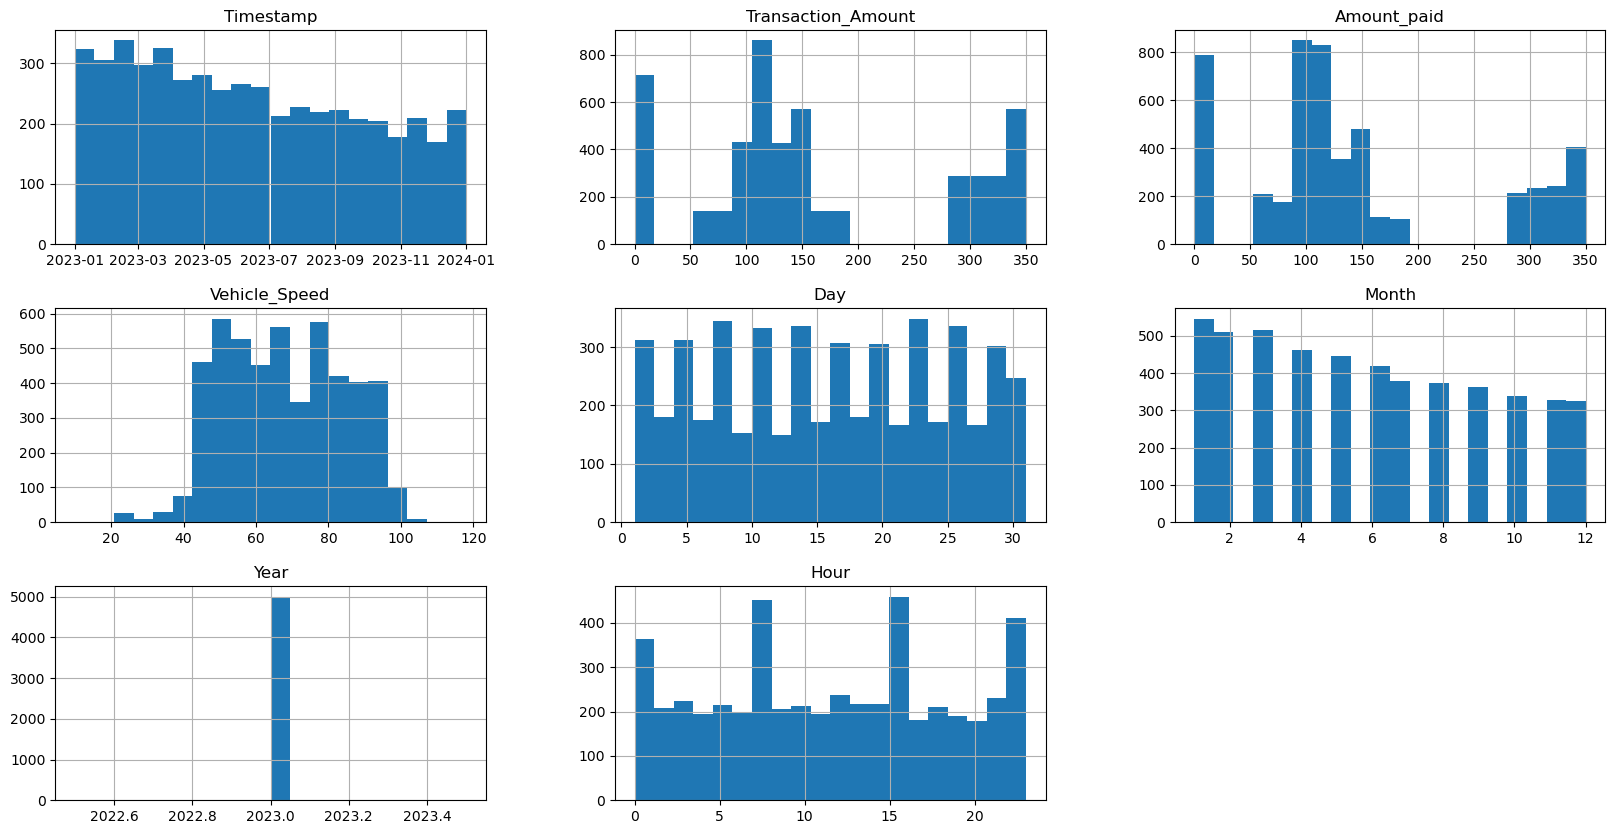

In [29]:
df.hist(figsize=(20, 10), bins=20)
plt.show()

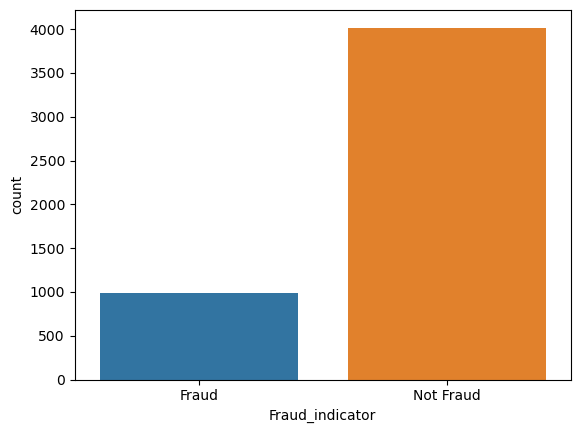

In [30]:
sns.countplot(x='Fraud_indicator', data=df)
plt.show()

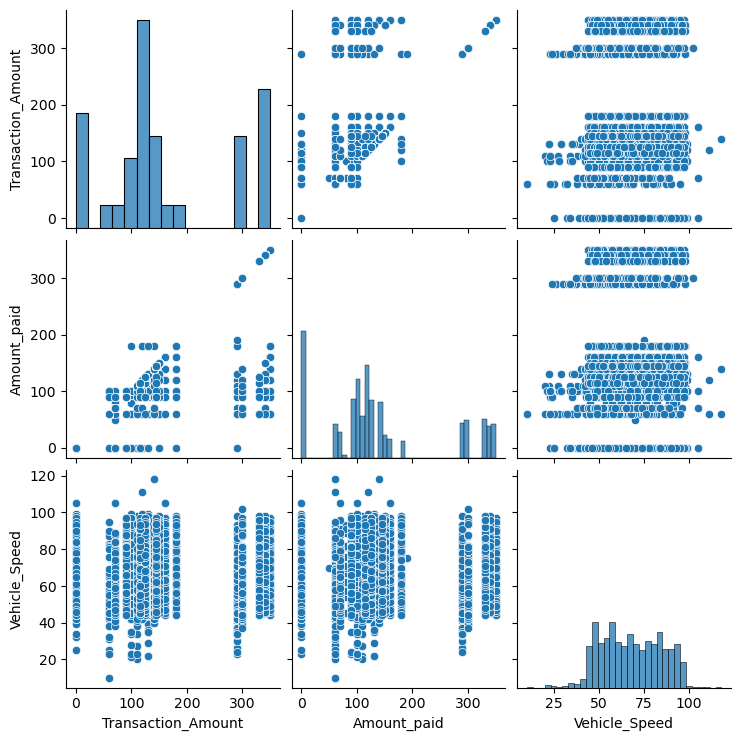

In [31]:
sns.pairplot(df, vars=['Transaction_Amount', 'Amount_paid', 'Vehicle_Speed'])
plt.show()

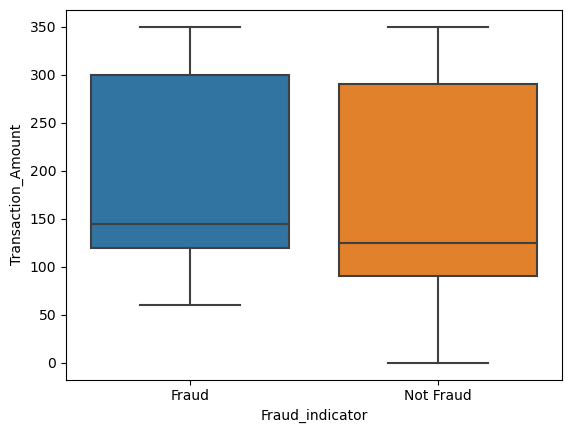

In [32]:
sns.boxplot(x='Fraud_indicator', y='Transaction_Amount', data=df)
plt.show()

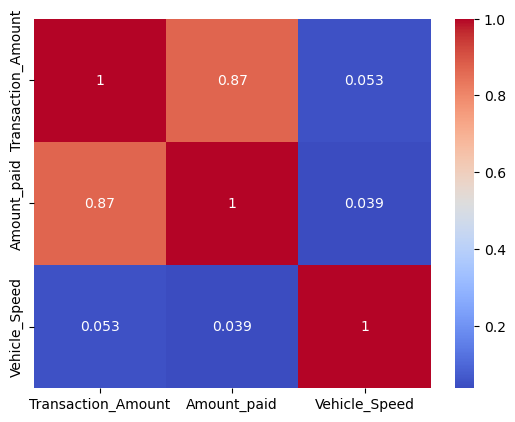

In [33]:
# Correlation matrix and heatmap for numerical variables
correlation_matrix = df[['Transaction_Amount', 'Amount_paid', 'Vehicle_Speed']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

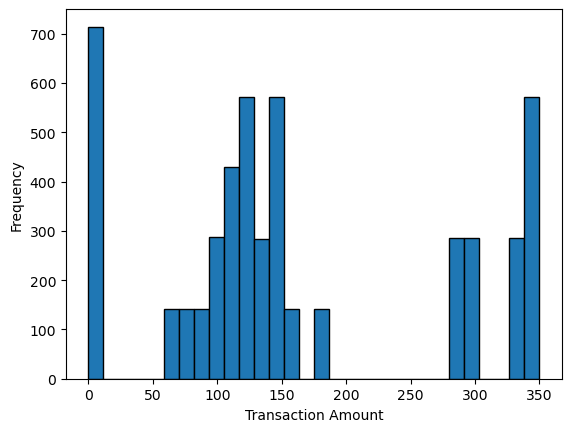

In [34]:
plt.hist(df['Transaction_Amount'], bins=30, edgecolor='black')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.show()

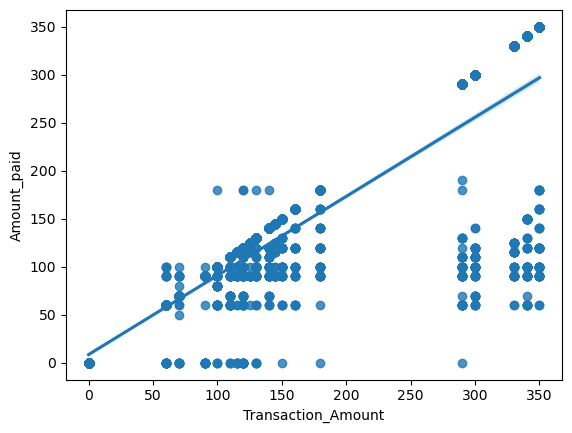

In [35]:
# Scatter plot with regression line between 'Transaction_Amount' and 'Amount_paid'
sns.regplot(x='Transaction_Amount', y='Amount_paid', data=df)
plt.show()

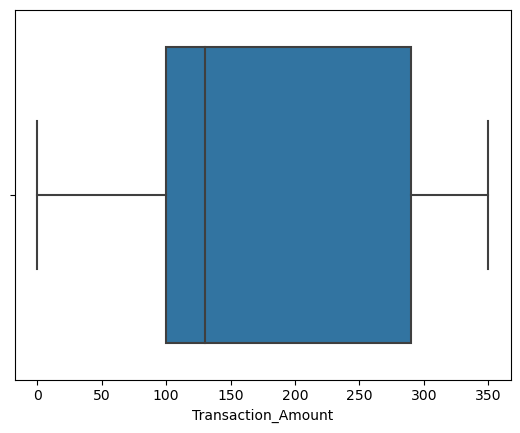

In [36]:
sns.boxplot(x='Transaction_Amount', data=df)
plt.show()

In [38]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder

In [39]:
#Select features Transaction_Amount, Amount_paid

selected_features = ['Transaction_Amount', 'Amount_paid']
X = df[selected_features]
y = df['Fraud_indicator']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [40]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

In [44]:
import xgboost as xgb

# Define the XGBoost classifier
model = xgb.XGBClassifier()

# Train the model
model.fit(X_train, y_train_encoded)

# Make predictions on the test set
y_pred_test = model.predict(X_test)
y_pred_train = model.predict(X_train)

# Calculate evaluation metrics for test set
accuracy_test = accuracy_score(y_test_encoded, y_pred_test)
recall_test = recall_score(y_test_encoded, y_pred_test)
precision_test = precision_score(y_test_encoded, y_pred_test)
f1_test = f1_score(y_test_encoded, y_pred_test)

# Calculate evaluation metrics for training set
accuracy_train = accuracy_score(y_train_encoded, y_pred_train)
recall_train = recall_score(y_train_encoded, y_pred_train)
precision_train = precision_score(y_train_encoded, y_pred_train)
f1_train = f1_score(y_train_encoded, y_pred_train)

print("Test Metrics:")
print("Accuracy:", accuracy_test)
print("Recall:", recall_test)
print("Precision:", precision_test)
print("F1 Score:", f1_test)

print("\nTrain Metrics:")
print("Accuracy:", accuracy_train)
print("Recall:", recall_train)
print("Precision:", precision_train)
print("F1 Score:", f1_train)


Test Metrics:
Accuracy: 1.0
Recall: 1.0
Precision: 1.0
F1 Score: 1.0

Train Metrics:
Accuracy: 0.99975
Recall: 1.0
Precision: 0.9996908809891808
F1 Score: 0.9998454166022569


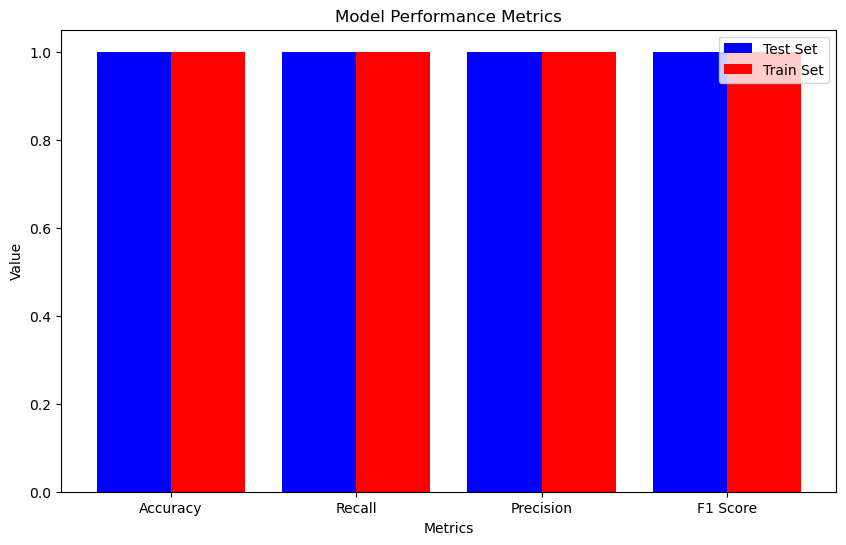

In [46]:
# Metrics for test set
test_metrics = [accuracy_test, recall_test, precision_test, f1_test]

# Metrics for training set
train_metrics = [accuracy_train, recall_train, precision_train, f1_train]

# Labels for the metrics
labels = ['Accuracy', 'Recall', 'Precision', 'F1 Score']

x = range(len(labels))

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(x, test_metrics, width=0.4, label='Test Set', color='b', align='center')
plt.bar([i + 0.4 for i in x], train_metrics, width=0.4, label='Train Set', color='r', align='center')
plt.xlabel('Metrics')
plt.ylabel('Value')
plt.title('Model Performance Metrics')
plt.xticks([i + 0.2 for i in x], labels)
plt.legend()
plt.show()